In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime , date
from mpl_toolkits.basemap import Basemap

from urllib import urlopen 
from bs4 import BeautifulSoup
import re

from __future__ import division # ensures that default division is real number division
%matplotlib inline
mpl.rc('figure', figsize=[8,8]) # make the figures bigger
mpl.rcParams.update({'font.size': 26})
mpl.rcParams.update({'lines.linewidth': 4})
mpl.rc('font',**{'family':'serif','serif':['Times']})
mpl.rc('text', usetex=True)
mpl.rc('axes', linewidth=2)   
mpl.rcParams.update({'xtick.minor.visible':True})
mpl.rcParams.update({'ytick.minor.visible':True})
mpl.rcParams.update({'xtick.major.size'   : 14 })
mpl.rcParams.update({'xtick.minor.size'   : 7  })
mpl.rcParams.update({'xtick.major.width'  : 1.5})
mpl.rcParams.update({'xtick.minor.width'  : 1  })
mpl.rcParams.update({'ytick.major.size'   : 14 })
mpl.rcParams.update({'ytick.minor.size'   : 7  })
mpl.rcParams.update({'ytick.major.width'  : 1.5})
mpl.rcParams.update({'ytick.minor.width'  : 1  })
mpl.rcParams.update({'ytick.direction'  : 'in'  })
mpl.rcParams.update({'xtick.direction'  : 'in'  })
mpl.rcParams.update({'xtick.top'  : True  })
mpl.rcParams.update({'ytick.right'  : True  })

In [3]:
monthKey= { 'Jan': 1,
            'Feb': 2,
            'Mar': 3,
            'Apr': 4,
            'May': 5,
            'Jun': 6,
            'Jul': 7,
            'Aug': 8,
            'Sep': 9,
            'Oct': 10,
            'Nov': 11,
            'Dec': 12
          }

def get_all_days(html_soup):
    days = []
    all_rows_in_html_page = html_soup.findAll("tr")
    for table_row in all_rows_in_html_page:
        row_cells = table_row.findAll("td")
    
        if (len(row_cells) == 21):
            r=re.match("(^[A-Za-z]+)",row_cells[0].text)
            if r and len(r.groups()) == 1 :
                month = r.group(1)
                continue
            #print row_cells[0].text
            day_entry = {
                    "day": date(2016,monthKey[month],int(row_cells[0].text)),
                    "temp_high"       :row_cells[1].text.strip(),
                    "temp_avg "       :row_cells[2].text.strip(),
                    "temp_low"        :row_cells[3].text.strip(),
                    "dewpt_high"      :row_cells[4].text.strip(),
                    "dewpt_avg"       :row_cells[5].text.strip(),
                    "dewpt_low"       :row_cells[6].text.strip(),
                    "humidity_high"   :row_cells[7].text.strip(),
                    "humidity_avg"    :row_cells[8].text.strip(),
                    "humidity_low"    :row_cells[9].text.strip(),
                    "seaPress_high"   :row_cells[10].text.strip(),
                    "seaPress_avg"    :row_cells[11].text.strip(),
                    "seaPress_low"    :row_cells[12].text.strip(),
                    "visibility_high" :row_cells[13].text.strip(),
                    "visibility_avg"  :row_cells[14].text.strip(),
                    "visibility_low"  :row_cells[15].text.strip(),
                    "wind_high"       :row_cells[16].text.strip(),
                    "wind_avg"        :row_cells[17].text.strip(),
                    "wind_low"        :row_cells[18].text.strip(),
                    "precip"          :row_cells[19].text.strip(),
                    #"events"          :row_cells[20].text.strip()
                     "events"                    :re.sub(r'\s+', '', row_cells[20].text)
                }
            days.append(day_entry)
    return days


In [4]:
def get_time(time_string,day, month, year ):
    tmp=time_string.split(':')
    hour=int(tmp[0])
    Min, AmPm =  tmp[1].split()
    if AmPm == 'AM' and hour == 12:
        hour -= 12
    if AmPm == 'PM' and hour != 12:
        hour += 12
    return datetime(year,month,day,hour,int(Min))
    


def get_hourly(html_soup, hours, day, month, year):

    all_rows_in_html_page = html_soup.findAll("tr")
    for table_row in all_rows_in_html_page:
        row_cells = table_row.findAll("td")
    
        if (len(row_cells) == 13):
            r=re.match("(^[A-Za-z]+)",row_cells[0].text)
            if r and len(r.groups()) == 1 :
                continue
            #print row_cells[0].text
            hourly_entry = {
                    "Time"       : get_time(row_cells[0].text.strip(),day,month,year),
                    "Temp"       :row_cells[1].text.strip(),
                    "Windchill"  :row_cells[2].text.strip(),
                    "Dew Point"  :row_cells[3].text.strip(),
                    "Humidity"   :row_cells[4].text.strip(),
                    "Pressure"   :row_cells[5].text.strip(),
                    "Visibility" :row_cells[6].text.strip(),
                    "Wind Dir"   :row_cells[7].text.strip(),
                    "Wind Speed" :row_cells[8].text.strip(),
                    "Gust Speed" :row_cells[9].text.strip(),
                    "Precip"     :row_cells[10].text.strip(),
                    "Events"     : re.sub(r'\s+', '', row_cells[11].text),
                    "Conditions" : row_cells[12].text.strip()
                }
            hours.append(hourly_entry)
        elif (len(row_cells) == 12):
            r=re.match("(^[A-Za-z]+)",row_cells[0].text)
            if r and len(r.groups()) == 1 :
                continue
            #print row_cells[0].text
            hourly_entry = {
                    "Time"       : get_time(row_cells[0].text.strip(),day,month,year),
                    "Temp"       :row_cells[1].text.strip(),
                    "Windchill"  :'NA',
                    "Dew Point"  :row_cells[2].text.strip(),
                    "Humidity"   :row_cells[3].text.strip(),
                    "Pressure"   :row_cells[4].text.strip(),
                    "Visibility" :row_cells[5].text.strip(),
                    "Wind Dir"   :row_cells[6].text.strip(),
                    "Wind Speed" :row_cells[7].text.strip(),
                    "Gust Speed" :row_cells[8].text.strip(),
                    "Precip"     :row_cells[9].text.strip(),
                    "Events"     : re.sub(r'\s+', '', row_cells[10].text),
                    "Conditions" : row_cells[11].text.strip()
                }
            hours.append(hourly_entry)
    return hours


In [5]:
hours=[]
for dtime in pd.date_range('2016-1-1','2016-12-31'):
    html = urlopen("https://www.wunderground.com/history/airport/KMDW/%i/%i/%i/DailyHistory.html"%(
                    dtime.year,dtime.month,dtime.day))
    html_soup = BeautifulSoup(html, 'html.parser')
    get_hourly(html_soup,hours,dtime.day,dtime.month,dtime.year)


In [6]:
hourly_weather_df = pd.DataFrame(hours)

In [7]:
html = urlopen("https://www.wunderground.com/history/airport/KORD/2016/1/1/CustomHistory.html?dayend=1&monthend=1&yearend=2017&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=")
html_soup = BeautifulSoup(html, 'html.parser')
weather_df = pd.DataFrame(get_all_days(html_soup))

In [8]:
divvy_DF = pd.read_csv("./2016_Q1Q2/Divvy_Trips_2016_Q1Q2/Divvy_Trips_2016_Q1.csv")

for i in xrange(4,7):
    divvy_DF= divvy_DF.append(pd.read_csv("./2016_Q1Q2/Divvy_Trips_2016_Q1Q2/Divvy_Trips_2016_0%i.csv"%i))
divvy_DF = divvy_DF.append(pd.read_csv("./2016_Q3Q4/Divvy_Trips_2016_Q3.csv"))
divvy_DF = divvy_DF.append(pd.read_csv("./2016_Q3Q4/Divvy_Trips_2016_Q4.csv"))
   

In [9]:
def convert_time(x):
    try:
        y=datetime.strptime(x,"%m/%d/%Y %H:%M")
    except ValueError:
        y=datetime.strptime(x,"%m/%d/%Y %H:%M:%S")
    return y

In [10]:
divvy_DF['starttime']=divvy_DF['starttime'].apply(lambda x: convert_time(x))
divvy_DF['stoptime']=divvy_DF['stoptime'].apply(lambda x: convert_time(x))
divvy_DF['age'] =2016- divvy_DF['birthyear'] 

In [11]:
divvy_DF=divvy_DF.sort_values(by=['starttime','stoptime'])

In [12]:
stations= pd.read_csv("./2016_Q3Q4/Divvy_Stations_2016_Q4.csv")

In [13]:
stations['online_date']=stations['online_date'].apply(lambda x: datetime.strptime(x,"%m/%d/%Y"))


In [14]:
days= divvy_DF.starttime.dt.date
days = np.asarray(days)
numRides = []
for cdat in pd.date_range("2016-1-1", "2016-12-31",freq='D'):
    #print cdat.date()
    numRides.append( (days  == cdat.date()).sum())
    

In [15]:
weather_df['numRides'] = pd.Series(np.asarray(numRides),index=weather_df.index)

In [16]:
hourly_weather_df= hourly_weather_df.set_index(pd.DatetimeIndex(hourly_weather_df['Time']))

In [17]:
morning = hourly_weather_df.between_time(datetime(1999,1,1,4,0).time(), datetime(1999,1,1,10,0).time())
noon = hourly_weather_df.between_time(datetime(1999,1,1,10,0).time(), datetime(1999,1,1,14,0).time())
evening = hourly_weather_df.between_time(datetime(1999,1,1,16,0).time(), datetime(1999,1,1,20,0).time())

In [18]:
noon.Temp = noon.Temp.map(lambda x : float(x.split()[0]))
morning.Temp = morning.Temp.map(lambda x : float(x.split()[0]))
evening.Temp = evening.Temp.map(lambda x : float(x.split()[0]))


/home/lantony/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
noon = noon['Temp'].groupby(noon.Time.dt.date).mean()
morning = morning['Temp'].groupby(morning.Time.dt.date).mean()
evening = evening['Temp'].groupby(evening.Time.dt.date).mean()

In [20]:
startDivvyDF = divvy_DF.set_index(pd.DatetimeIndex(divvy_DF.starttime))

In [185]:
#mRides=[]
#nRides=[]
#eRides=[]
#for i in pd.date_range("2016-1-1", "2016-12-31",freq='D'):
#    mRides.append(((divvy_DF[divvy_DF.starttime.dt.date == i.date()].starttime  >= datetime(i.year,i.month,i.day,4,0))*( 
#                    divvy_DF[divvy_DF.starttime.dt.date == i.date()].starttime  < datetime(i.year,i.month,i.day,10,0))).sum())
#    nRides.append(((divvy_DF[divvy_DF.starttime.dt.date == i.date()].starttime  >= datetime(i.year,i.month,i.day,10,0))*( 
#                    divvy_DF[divvy_DF.starttime.dt.date == i.date()].starttime  <= datetime(i.year,i.month,i.day,14,0))).sum())
#    eRides.append(((divvy_DF[divvy_DF.starttime.dt.date == i.date()].starttime  >= datetime(i.year,i.month,i.day,16,0))*( 
#                    divvy_DF[divvy_DF.starttime.dt.date == i.date()].starttime  <= datetime(i.year,i.month,i.day,20,0))).sum())
    


In [21]:
from pandas.tseries.offsets import BDay
isBusinessDay = BDay().onOffset

matchBDays = pd.to_datetime(startDivvyDF.starttime).map(isBusinessDay)

In [106]:
startDivvyDF[matchBDays]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
starttime,,,,,,,,,,,,,
2016-01-01 00:07:00,8547211,2016-01-01 00:07:00,2016-01-01 00:16:00,1094,508,419,Lake Park Ave & 53rd St,413,Woodlawn Ave & Lake Park Ave,Subscriber,Male,1965.0,51.0
2016-01-01 00:14:00,8547214,2016-01-01 00:14:00,2016-01-01 00:25:00,4339,615,190,Southport Ave & Wrightwood Ave,220,Hampden Ct & Diversey Pkwy,Subscriber,Female,1981.0,35.0
2016-01-01 00:15:00,8547215,2016-01-01 00:15:00,2016-01-01 00:27:00,1190,744,307,Southport Ave & Clybourn Ave,213,Leavitt St & North Ave,Subscriber,Male,1994.0,22.0
2016-01-01 00:16:00,8547217,2016-01-01 00:16:00,2016-01-01 00:24:00,2048,484,125,Rush St & Hubbard St,133,Kingsbury St & Kinzie St,Subscriber,Female,1976.0,40.0
2016-01-01 00:16:00,8547216,2016-01-01 00:16:00,2016-01-01 00:24:00,1530,512,125,Rush St & Hubbard St,133,Kingsbury St & Kinzie St,Subscriber,Male,1982.0,34.0
2016-01-01 00:17:00,8547218,2016-01-01 00:17:00,2016-01-01 00:27:00,2413,590,52,Michigan Ave & Lake St,59,Wabash Ave & Roosevelt Rd,Customer,NaN,NaN,NaN
2016-01-01 00:18:00,8547219,2016-01-01 00:18:00,2016-01-01 00:30:00,2289,704,85,Michigan Ave & Oak St,74,Kingsbury St & Erie St,Subscriber,Male,1988.0,28.0
2016-01-01 00:20:00,8547220,2016-01-01 00:20:00,2016-01-01 00:33:00,3564,721,364,Larrabee St & Oak St,96,Desplaines St & Randolph St,Subscriber,Female,1983.0,33.0
2016-01-01 00:25:00,8547221,2016-01-01 00:25:00,2016-01-01 00:52:00,774,1613,58,Marshfield Ave & Cortland St,312,Clarendon Ave & Gordon Ter,Subscriber,Male,1986.0,30.0


In [107]:
left_station= startDivvyDF[matchBDays].groupby('from_station_id')['trip_id'].nunique()
to_station= startDivvyDF[matchBDays].groupby('to_station_id')['trip_id'].nunique()

In [62]:
stations=stations.sort_values(by='id')
stations = stations.set_index(stations['id'])

In [66]:
nbusinessDays_online =stations.online_date.apply(lambda x : min(pd.date_range(datetime(2016,1,1), datetime(2016,12,31), freq='B').shape[0] ,
                                          pd.date_range(x, datetime(2016,12,31), freq='B').shape[0] )) 

In [108]:
business_day_flux= np.divide(to_station - left_station,nbusinessDays_online, dtype=float)

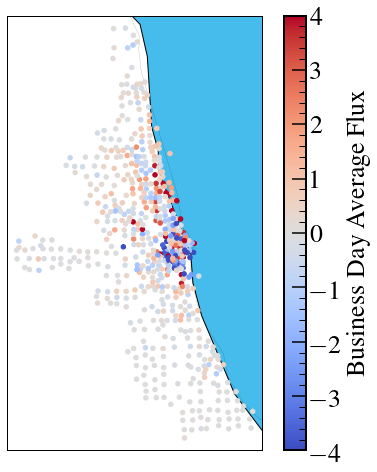

In [109]:
margin = .01 # buffer to add to the range
lat_min = stations['latitude'].min() - margin
lat_max = stations['latitude'].max() + margin
long_min = stations['longitude'].min() - margin
long_max = stations['longitude'].max() + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawstates()
m.drawcounties()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and long to map projection coordinates
lons, lats = m(list(stations['longitude']), list(stations['latitude']))
# plot points as red dots


cm = plt.cm.get_cmap('coolwarm')

sc = m.scatter(lons, lats, marker = 'o', c=business_day_flux, vmin=-4, vmax=4, cmap=cm,zorder=5,s=20)

cbar= plt.colorbar(sc)
cbar.set_label("Business Day Average Flux")
plt.savefig('business_day_flux.pdf')
plt.show()

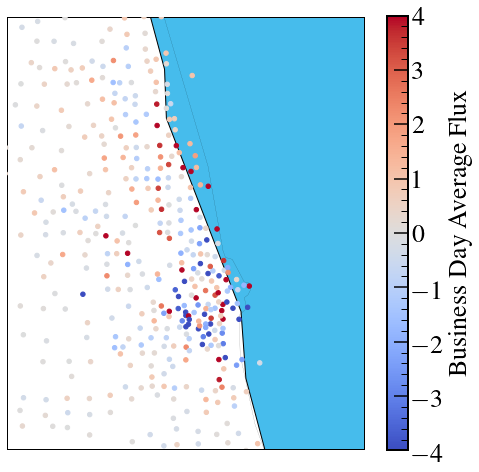

In [112]:
margin =0.01 # buffer to add to the range
lat_min = stations['latitude'].min() +0.1
lat_max = stations['latitude'].max() -0.08 
long_min = stations['longitude'].min() + 0.08
long_max = stations['longitude'].max() - 0.01

# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawstates()
m.drawcounties()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and long to map projection coordinates
lons, lats = m(list(stations['longitude']), list(stations['latitude']))
# plot points as red dots


cm = plt.cm.get_cmap('coolwarm')

sc = m.scatter(lons, lats, marker = 'o', c=business_day_flux, vmin=-4, vmax=4, cmap=cm,zorder=5,s=20)

cbar= plt.colorbar(sc)
cbar.set_label("Business Day Average Flux")
plt.savefig("business_day_flux_downtown.pdf")
plt.show()

In [113]:
nb_left_station= startDivvyDF[matchBDays].groupby('from_station_id')['trip_id'].nunique()
nb_to_station= startDivvyDF[matchBDays].groupby('to_station_id')['trip_id'].nunique()
num_NON_Busin = 366-nbusinessDays_online

In [114]:
nonbusiness_day_flux= np.divide(nb_to_station - nb_left_station,num_NON_Busin, dtype=float)

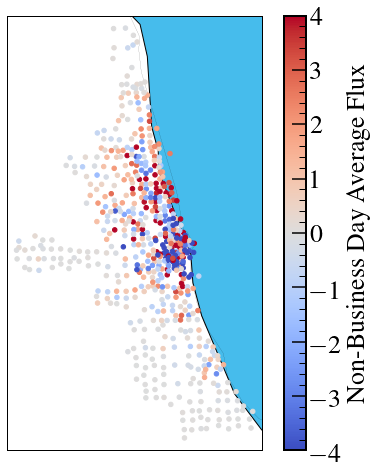

In [115]:
margin = .01 # buffer to add to the range
lat_min = stations['latitude'].min() - margin
lat_max = stations['latitude'].max() + margin
long_min = stations['longitude'].min() - margin
long_max = stations['longitude'].max() + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawstates()
m.drawcounties()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and long to map projection coordinates
lons, lats = m(list(stations['longitude']), list(stations['latitude']))
# plot points as red dots


cm = plt.cm.get_cmap('coolwarm')

sc = m.scatter(lons, lats, marker = 'o', c=nonbusiness_day_flux, vmin=-4, vmax=4, cmap=cm,zorder=5,s=20)

cbar= plt.colorbar(sc)
cbar.set_label("Non-Business Day Average Flux")
plt.savefig('nonbusiness_day_flux.pdf')
plt.show()

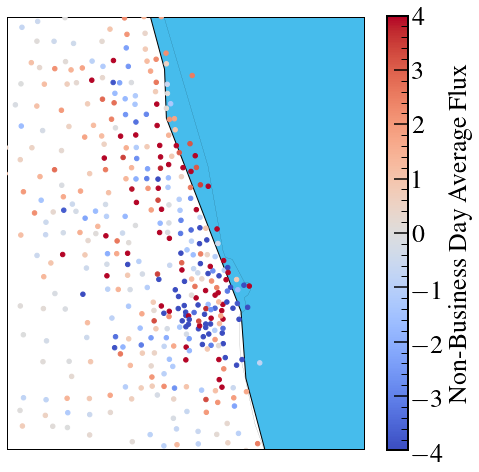

In [117]:
margin =0.01 # buffer to add to the range
lat_min = stations['latitude'].min() +0.1
lat_max = stations['latitude'].max() -0.08 
long_min = stations['longitude'].min() + 0.08
long_max = stations['longitude'].max() - 0.01

# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawstates()
m.drawcounties()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and long to map projection coordinates
lons, lats = m(list(stations['longitude']), list(stations['latitude']))
# plot points as red dots


cm = plt.cm.get_cmap('coolwarm')

sc = m.scatter(lons, lats, marker = 'o', c=nonbusiness_day_flux, vmin=-4, vmax=4, cmap=cm,zorder=5,s=20)

cbar= plt.colorbar(sc)
cbar.set_label("Non-Business Day Average Flux")
plt.savefig("nonbusiness_day_flux_downtown.pdf")
plt.show()

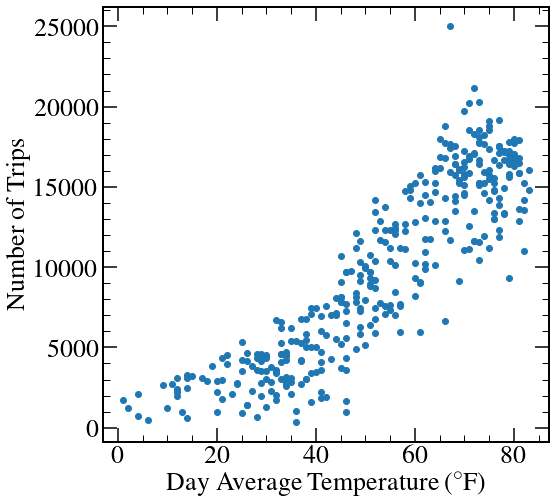

In [118]:
plt.plot(weather_df['temp_avg '],weather_df['numRides'],'o')
plt.xlabel(r'Day Average Temperature ($^\circ$F)')
plt.ylabel('Number of Trips')
plt.savefig("temp_trips.pdf")

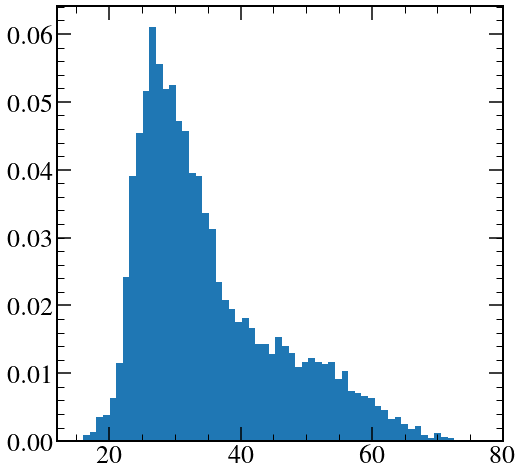

In [93]:
hist, bins, patch = plt.hist(divvy_DF[divvy_DF['usertype'] == 'Subscriber']['age'],bins=100,normed=True)
tmp=plt.xlim(12,80)

In [90]:
M= (divvy_DF['gender'] == 'Male').sum()
F=(divvy_DF['gender'] == 'Female').sum()
tot=M+F
print "Males: %.3f and Females: %.3f"%(M/tot,F/tot)

Males: 0.748 and Females: 0.252
